<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week02-LR/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 Normal equation (Numpy version)

In [65]:
import numpy as np
np.set_printoptions(precision=3)
# Analytical: θ= (X T X )−1X T y
x = np.array([2,5,1]) # [0,0,0] non-investible
y = np.array([12,9,6])
x_b = np.c_[np.ones((len(x),1)),x]
print("x_b = ",x_b)

#call inverse function from linear algebra module
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
# note function pinv is Moore–Penrose Pseudo-inverse
print(type(theta))
print("theta = ", theta)

x_b =  [[1. 2.]
 [1. 5.]
 [1. 1.]]
<class 'numpy.ndarray'>
theta =  [8.077 0.346]


x_test =  range(0, 11)
y predict =  [ 8.077  8.423  8.769  9.115  9.462  9.808 10.154 10.5   10.846 11.192
 11.538]


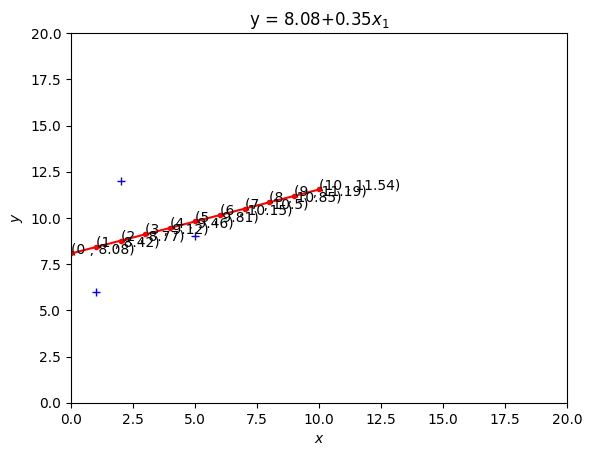

In [66]:
#prediction
x_t = range(0,11)
x_t_b = np.c_[np.ones((len(x_t),1)), x_t]
y_p = x_t_b.dot(theta)
print("x_test = ",x_t)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$")
plt.plot(x_t, y_p,"r.-")
plt.plot(x, y, "b+")
for x,y in zip(x_t, y_p):
  plt.text( x ,y, f"({np.round(x,2)} , {np.round(y,2)})")
plt.axis([0,20,0,20])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()


## 1.2 Normal equation (Sklearn version)

In [67]:
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
x = np.array([[2,5,1]]).T
y = np.array([12,9,6])

lin_reg = LinearRegression()
lin_reg.fit(x, y)
display(Latex(f'$y = {np.round(lin_reg.intercept_,2)}+{np.round(lin_reg.coef_[0],2)}x_{1}$'))
x_n = np.array([[1,5]]).T
ans = lin_reg.predict(x_n)
print("Predicted results = ")
print(ans)

<IPython.core.display.Latex object>

Predicted results = 
[8.423 9.808]


#2. Gradient descent


In [68]:
import random
import math

In [69]:
#Relation between key=theta, value=J
lossTheta0 = {}
lossTheta1 = {}

In [70]:
# Note MSE function
def cost_function(theta0, theta1, x, y, N):
    c = 1/(N) * sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(N)])
    return c

In [71]:
import random
import math

def gradient_descent(eta, x, y, ep=0.001, max_iter=10000):

  global lossTheta0, lossTheta1 # Declare them as global to modify
  lossTheta0.clear() # Clear at the start of the function to ensure fresh data
  lossTheta1.clear() # Clear at the start of the function

  converged = False
  t = 0
  N = x.shape[0] # number of samples

  # initial theta
  theta0 = 0.1 #np.random.random(x.shape[1])
  print("Initial theta0 ",theta0)

  theta1 = 0.1 #np.random.random(x.shape[1])
  print("Initial theta1",theta1)

  # total error, J(theta)
  J = cost_function(theta0,theta1,x,y,N)
  print("First J = ",J)

  # Record initial state (iteration 0)
  lossTheta0[t] = J[0] # Store iteration number as key, J as value

  # Iterate Loop
  while not converged:

    grad0 = sum([(theta0 + theta1*x[i] - y[i])*1 for i in range(N)])
    grad1 = sum([(theta0 + theta1*x[i] - y[i])*x[i] for i in range(N)])

    # update the theta_temp
    theta0 = theta0 - eta * (1/N) * grad0
    theta1 = theta1 - eta * (1/N) * grad1

    # error
    e = cost_function(theta0,theta1,x,y,N)
    #print("error = ",e)

    #Terminate 1
    if abs(J-e) <= ep:
        print("Case eps: Converged at ", t, "/", max_iter)
        print("t0 = ",theta0)
        print("t1 = ",theta1)
        converged = True

    J = e   # update error s
    t += 1  # update iter

    # Record the loss at this iteration
    lossTheta0[t] = J[0] # Store iteration number as key, J as value

    if False:
      print("\niter = ",t)
      print("t0 = ",theta0)
      print("t1 = ",theta1)
      print("test", t % 100 == 0)

    if math.floor(t % 1000) == 0:
      # This block is now only for printing debug info at certain intervals.
      print("iter = ",t, ", error = ", J)

    #Termiate 2
    if t == max_iter:
        print('Case iter> Max interation exceeded!')
        print("t0 = ",theta0)
        print("t1 = ",theta1)
        converged = True

  return np.array([theta0,theta1]).reshape(-1)

x.shape = (3, 1) y.shape = (3,)
Initial theta0  0.1
Initial theta1 0.1
First J =  [80.363]
iter =  1000 , error =  [5.725]
iter =  2000 , error =  [5.654]
iter =  3000 , error =  [5.654]
iter =  4000 , error =  [5.654]
Case eps: Converged at  4239 / 5000
t0 =  [8.077]
t1 =  [0.346]
<class 'numpy.ndarray'>
0.3461757482072316


/tmp/ipython-input-4005875380.py:22: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.



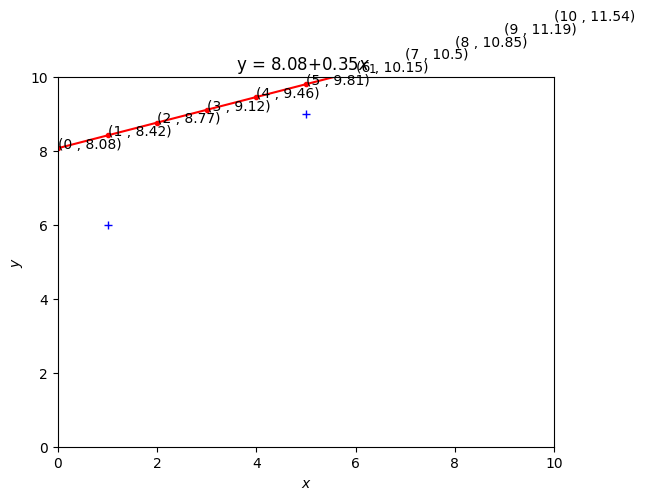

In [72]:
if __name__ == '__main__':

  x = np.array([[2,5,1]]).T # or x = np.array([[0],[2],[3]])
  y = np.array([12,9,6])
  print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
  eta = 0.01 # learning rate

  theta = gradient_descent(eta, x, y, ep=0.00000000001, max_iter=5000)
  print(type(theta))
  print (theta[len(theta)-1])

  #prediction
  x_t = range(0,11)
  x_t_b = np.c_[np.ones((len(x_t),1)), x_t]
  y_p = x_t_b.dot(theta)
  #print("x_test = ",x_t)
  #print("y predict = ",y_p)

  # plot
  plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$")
  plt.plot(x_t, y_p,"r.-")
  plt.plot(x, y, "b.",marker="+")
  for x,y in zip(x_t, y_p):
    plt.text( x ,y, f"({np.round(x,2)} , {np.round(y,2)})")
  plt.axis([0,10,0,10])
  plt.xlabel(r'$x$')
  plt.ylabel(r'$y$')
  plt.show()

#Gradient Descent curve Static VS Dynamic

4241


Text(0, 0.5, '$Cost value (J)$')

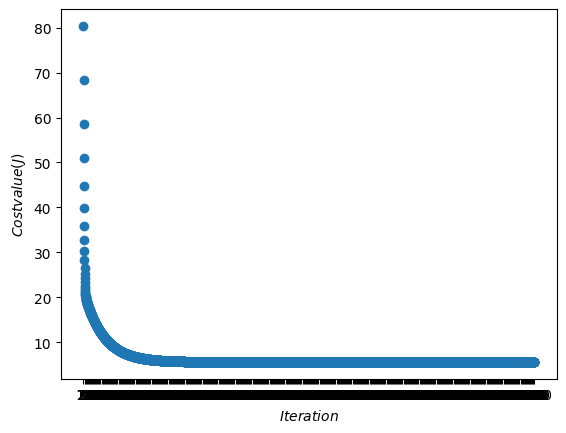

In [73]:
lists = sorted(lossTheta0.items()) # sorted by key, return a list of tuples
numPoints = len(lists)
print(numPoints)
_x, _y = zip(*lists) # unpack a list of pairs into two tuples
plt.scatter(range(numPoints),_y)
plt.xticks(range(0,numPoints,10))
plt.xlabel(r'$Iteration$')
plt.ylabel(r'$Cost value (J)$')

In [74]:
import plotly.graph_objects as go
import numpy as np

_x = list(_x)
_y = list(_y)
xm = np.min(_x) - 0.2
xM = np.max(_x) + 0.2
ym = np.min(_y) - 0.2
yM = np.max(_y) + 0.2
N = len(_x)

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],

    layout=go.Layout(

        xaxis=dict(range=[xm, xM]),
        yaxis=dict(range=[ym, yM]),

        title_text="Gradient Descent",
        hovermode="closest",
        xaxis_title=r"$\theta_0$",
        yaxis_title="Cost function (J)",

        updatemenus=[
            dict(type="buttons",
                          buttons=[dict(label="Click to play",
                                        method="animate",
                                        args=[None])]
                 )
            ]
        ),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[_x[k]],
            y=[_y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])
        for k in range(0,N,5)],
)

fig.show()